In [1]:
import requests
import pandas as pd
import json
from shapely.geometry import shape
import geopandas as gpd

# Define the URL of the fission function
url = 'http://localhost:9090/permature-twitter'

# Set the same request header
headers = {
    'Accept': 'application/json',
    'Content-Type': 'application/json',
}

# Send a GET request to retrieve data
response = requests.get(url, headers=headers)

# Check the response status code
print(f"HTTP response status code: {response.status_code}")

if response.status_code == 200:
    try:
        # Directly read the complete response content
        data = response.text

        # Print the first 500 characters of the complete response content
        print(f"HTTP response content: {data[:500]}...")

        # Parsing JSON data
        data = json.loads(data)

        # Print data structure
        print(json.dumps(data, indent=2))

        # Check for errors
        if 'error' in data:
            print(f"Error from server: {data['error']}")
        else:
            # Convert data to Pandas DataFrame
            suic_df = pd.DataFrame(data['data'])

            # Print column names
            print(suic_df.columns)

            # Convert the geometry column to a shapely object
            suic_df['geometry'] = suic_df['geometry'].apply(lambda x: shape(x) if x else None)

            # Convert to GeoDataFrame
            gdf = gpd.GeoDataFrame(suic_df, geometry='geometry')

            # Save as GeoJSON file
            geojson_file = 'suic_data.geojson'
            gdf.to_file(geojson_file, driver='GeoJSON')

            print(f"GeoJSON file saved as {geojson_file}")

    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
        print(f"Response content: {data[:500]}...")  
else:
    print(f"HTTP request failed with status code {response.status_code}")
    print(f"Error message: {response.text}")


HTTP response status code: 404
HTTP request failed with status code 404
Error message: 404 page not found



In [2]:
file_path = 'suic_data.geojson'
premature_gdf = gpd.read_file(file_path)

In [3]:
gdf = premature_gdf
premature_gdf 

,_id,count_suic,ratio_suic,phn_name,geometry
0,hMzehI8BrPb-hKkEoiq8,8.168,592,Central and Eastern Sydney,"MULTIPOLYGON (((151.26582 -33.92539, 151.26563..."
1,hczehI8BrPb-hKkEwCoK,7.235,300,Northern Sydney,"MULTIPOLYGON (((151.32807 -33.66000, 151.32802..."
2,hszehI8BrPb-hKkExir9,7.422,308,Western Sydney,"POLYGON ((150.98395 -33.38793, 150.98396 -33.3..."
3,h8zehI8BrPb-hKkExir9,10.864,181,Nepean Blue Mountains,"POLYGON ((150.11620 -32.88529, 150.11859 -32.8..."
4,iMzehI8BrPb-hKkEzCoc,7.705,321,South Western Sydney,"POLYGON ((150.41818 -33.80965, 150.41805 -33.8..."
5,iczehI8BrPb-hKkE0CrL,12.186,329,South Eastern NSW,"MULTIPOLYGON (((150.05118 -37.26355, 150.05123..."
6,iszehI8BrPb-hKkE4Cpi,11.499,157,Western NSW,"POLYGON ((146.37539 -28.99878, 146.06778 -28.9..."
7,i8zehI8BrPb-hKkE7Sq-,12.203,672,Hunter New England and Central Coast,"MULTIPOLYGON (((151.31662 -33.55563, 151.31658..."
8,jMzehI8BrPb-hKkE_CqU,13.971,312,North Coast,"MULTIPOLYGON (((152.93518 -31.44644, 152.93501..."
9,jczfhI8BrPb-hKkEAiqx,12.616,134,Murrumbidgee,"POLYGON ((145.34428 -32.68249, 145.25728 -32.6..."


NameError: name 'gdf' is not defined

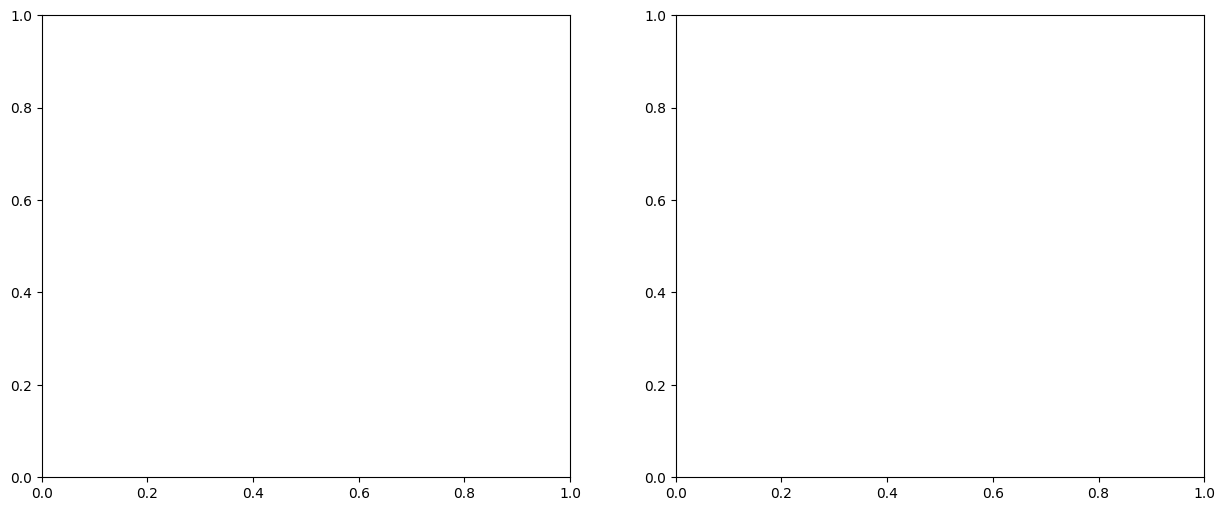

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(y=gdf['ratio_suic'], ax=ax[0])
ax[0].set_title('Boxplot of Suicide Death Count')
ax[0].set_ylabel('Suicide Death Count')

sns.boxplot(y=gdf['count_suic'], ax=ax[1])
ax[1].set_title('Boxplot of Suicide Death Ratio')
ax[1].set_ylabel('Suicide Death Ratio')

In [ ]:

# Basic statistical description
summary_stats = gdf.describe()

# Draw a distribution map
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Draw the distribution of suicide deaths
gdf['ratio_suic'].plot(kind='density', ax=ax[0])
ax[0].set_title('Suicide Death Count Distribution')
ax[0].set_xlabel('Suicide Death Count')
ax[0].set_ylabel('Frequency')

# Draw the distribution of suicide mortality rates
gdf['count_suic'].plot(kind='density', ax=ax[1])
ax[1].set_title('Suicide Death Ratio Distribution')
ax[1].set_xlabel('Suicide Death Ratio')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()



In [ ]:
# Draw a geographical distribution map
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, column='ratio_suic', legend=True, cmap='OrRd', legend_kwds={'label': "Suicide Death Count"})
ax.set_title('Geographical Distribution of Suicide Death Count')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data_for_clustering = gdf[['ratio_suic']].dropna()

# Using KMeans clustering algorithm
kmeans = KMeans(n_clusters=2)
kmeans.fit(data_for_clustering)
gdf['cluster'] = kmeans.labels_

# Draw a density map of the distribution of suicide deaths
fig, ax = plt.subplots(figsize=(10, 6))

#Draw density maps for each cluster
for cluster in gdf['cluster'].unique():
    subset = gdf[gdf['cluster'] == cluster]
    sns.kdeplot(subset['ratio_suic'], ax=ax, label=f'Cluster {cluster}', fill=True)
ax.set_title('Suicide Death Count Density by Cluster')
ax.set_xlabel('Suicide Death Count')
ax.set_ylabel('Density')
ax.legend()

plt.tight_layout()
plt.show()



In [ ]:
# Separate data from two groups
cluster_0 = gdf[gdf['cluster'] == 0]
cluster_1 = gdf[gdf['cluster'] == 1]

# Calculate basic statistical information for each group
stats_0 = cluster_0[['ratio_suic']].describe()
stats_1 = cluster_1[['ratio_suic']].describe()

# Display statistical information
print("Cluster 0 Statistics:")
print(stats_0)

print("\nCluster 1 Statistics:")
print(stats_1)

In [ ]:
import pandas as pd
import folium
from folium import GeoJson
from shapely.geometry import shape
import json
import geopandas as gpd

# Ensure that the geometric objects in the geometry column are correct
gdf['geometry'] = gdf['geometry'].apply(shape)
gdf = gpd.GeoDataFrame(gdf, geometry='geometry')

# Creating Map Objects
m = folium.Map(location=[gdf.geometry.centroid.y.mean(), gdf.geometry.centroid.x.mean()], zoom_start=6)

# Create GeoJson layer
geojson_layer = GeoJson(
    gdf.to_json(),  
    style_function=lambda x: {
        'fillColor': '#3186cc', 
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.6
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['phn_name', 'ratio_suic'],  
        aliases=['PHN Name:', 'Deaths by Suicide:'],  
        localize=True
    )
)
geojson_layer.add_to(m)



In [ ]:
m.save('premature_mortality_map.html')

In [ ]:
import requests
import pandas as pd
import json
from shapely.geometry import shape
import geopandas as gpd

# Define the URL of the Session function
url = 'http://localhost:31313/twitter-data'

headers = {
    'Accept': 'application/json',
    'Content-Type': 'application/json',
}

# Send a GET request to retrieve data
response = requests.get(url, headers=headers)

# Check the response status code
print(f"HTTP response status code: {response.status_code}")

if response.status_code == 200:
    try:
        
        data = response.text

        print(f"HTTP response content: {data[:500]}...")

      
        data = json.loads(data)

        print(json.dumps(data, indent=2))

        
        if 'error' in data:
            print(f"Error from server: {data['error']}")
        else:
           
            geojson_data = data['data']


            gdf = gpd.GeoDataFrame.from_features(geojson_data['features'])


            geojson_file = 'twitter-data.geojson'
            gdf.to_file(geojson_file, driver='GeoJSON')

            print(f"GeoJSON file saved as {geojson_file}")

    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
        print(f"Response content: {data[:500]}...")  # 仅打印前500个字符以防止内容过多
else:
    print(f"HTTP request failed with status code {response.status_code}")
    print(f"Error message: {response.text}")


In [ ]:
import geopandas as gpd


file_path = 'twitter-data.geojson'
twitter_gdf = gpd.read_file(file_path)


print(twitter_gdf.info())
print(twitter_gdf.head())


In [ ]:
# Check for missing values
print(twitter_gdf.isnull().sum())

# 确保geometry列中的几何对象是正确的
twitter_gdf['geometry'] = twitter_gdf['geometry'].apply(lambda x: shape(x) if isinstance(x, dict) else x)
twitter_gdf = gpd.GeoDataFrame(twitter_gdf, geometry='geometry')

# Extract longitude and latitude data
twitter_gdf['longitude'] = twitter_gdf.geometry.x
twitter_gdf['latitude'] = twitter_gdf.geometry.y

# Convert Timestamp type columns to strings
if 'created_at' in twitter_gdf.columns:
    twitter_gdf['created_at'] = twitter_gdf['created_at'].astype(str)


print(twitter_gdf.info())
print(twitter_gdf.head())


In [ ]:
import pandas as pd
import folium
from folium import GeoJson
from shapely.geometry import shape, box, Point
import json
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Draw a density map of sentiment distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(twitter_gdf['sentiment'], fill=True)
plt.title('Sentiment Density Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Density')   
plt.show()



In [ ]:
# Draw the relationship between geographical location and sentiment
plt.figure(figsize=(10, 6))
sns.scatterplot(data=twitter_gdf, x='longitude', y='latitude', hue='sentiment', palette='coolwarm')
plt.title('Geographical Distribution of Sentiment')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Sentiment')
plt.show()

In [ ]:
from folium.plugins import MarkerCluster
from sklearn.cluster import DBSCAN
m = folium.Map(location=[0, 0], zoom_start=2)


marker_cluster = MarkerCluster().add_to(m)


for idx, row in twitter_gdf.iterrows():
   
    lon,lat  = row['geometry'].centroid.coords[0]
    
    folium.Marker([lat,lon], 
                  popup=f"Sentiment Score: {row['sentiment']}").add_to(marker_cluster)


m.save('twitter_data_map.html')

In [ ]:
# Check CRS and convert
print("Premature Mortality CRS:", premature_gdf.crs)
print("Twitter CRS:", twitter_gdf.crs)


In [ ]:
import geopandas as gpd
import folium

# Check and ensure CRS consistency
if twitter_gdf.crs != premature_gdf.crs:
    twitter_gdf = twitter_gdf.to_crs(premature_gdf.crs)

# Aggregating the position of duplicate points
twitter_gdf['coords'] = twitter_gdf['geometry'].apply(lambda geom: (geom.x, geom.y))
twitter_grouped = twitter_gdf.groupby('coords').agg({
    'sentiment': 'sum',
    'geometry': 'first'
}).reset_index()

twitter_grouped['sentiment'] = twitter_grouped['sentiment'].round(2)

# Check the geometric type of permature_gdf
print("Premature GDF Geometry Type:")
print(premature_gdf.geom_type.unique())

# Make spatial connections
joined_gdf = gpd.sjoin(twitter_gdf, premature_gdf, how="inner", op='within')

print("Joined Data:")
print(joined_gdf.head())

# Ensure that the 'dths_rspr0' and 'sentimentnt' columns exist in joined_gdf
if 'dths_rspr0' in joined_gdf.columns and 'sentiment' in joined_gdf.columns:
    # Calculate the average sentiment and dths_rspr0 for each region
    grouped = joined_gdf.groupby('phn_code').agg({
        'sentiment': 'mean',
        'dths_rspr0': 'mean'
    }).reset_index()

    print("Grouped Data:")
    print(grouped)

    # Merge grouped data back into permature_gdf
    premature_gdf = premature_gdf.merge(grouped, on='phn_code')
    print("Premature Mortality Data with Grouped Values:")
    print(premature_gdf.head())


    m = folium.Map(location=[premature_gdf.geometry.centroid.y.mean(), premature_gdf.geometry.centroid.x.mean()], zoom_start=6)


    folium.Choropleth(
        geo_data=premature_gdf,
        name='choropleth',
        data=premature_gdf,
        columns=['phn_code', 'dths_rspr0_x'],
        key_on='feature.properties.phn_code',
        fill_color='YlGn',
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name='Premature Mortality (dths_rspr0)'
    ).add_to(m)


    for idx, row in twitter_grouped.iterrows():
        folium.Marker(
            location=[row.geometry.y, row.geometry.x],
            popup=f'Sentiment Sum: {row["sentiment"]}',
            icon=folium.DivIcon(html=f"""<div style="font-size: 12pt; color : black">{row["sentiment"]:.2f}</div>""")
        ).add_to(m)

    m.save('premature_mortality_twitter_map.html')
    print("Map has been saved as 'premature_mortality_twitter_map.html'")
else:
    print("Required columns 'dths_rspr0' and 'sentiment' not found in the joined GeoDataFrame.")


In [ ]:
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster


twitter_gdf = gpd.read_file('twitter-data.geojson')
premature_gdf = gpd.read_file('suic_data.geojson')

if twitter_gdf.crs != premature_gdf.crs:
    twitter_gdf = twitter_gdf.to_crs(premature_gdf.crs)


print("Twitter GDF bounds:")
print(twitter_gdf.total_bounds)
print("Premature GDF bounds:")
print(premature_gdf.total_bounds)


twitter_bounds = twitter_gdf.total_bounds
premature_bounds = premature_gdf.total_bounds

if (twitter_bounds[0] > premature_bounds[2] or twitter_bounds[2] < premature_bounds[0] or
        twitter_bounds[1] > premature_bounds[3] or twitter_bounds[3] < premature_bounds[1]):
    print("Twitter points are outside the bounds of the premature data polygons.")
else:
    print("Twitter points are within the bounds of the premature data polygons.")

# Aggregating the position of duplicate points
twitter_gdf['coords'] = twitter_gdf['geometry'].apply(lambda geom: (geom.x, geom.y))
twitter_grouped = twitter_gdf.groupby('coords').agg({
    'sentiment': 'sum',
    'geometry': 'first'
}).reset_index()

twitter_grouped['sentiment'] = twitter_grouped['sentiment'].round(2)


print("Premature GDF Geometry Type:")
print(premature_gdf.geom_type.unique())


print("Twitter GDF Sample:")
print(twitter_gdf.head())
print("Premature GDF Sample:")
print(premature_gdf.head())


joined_gdf = gpd.sjoin(twitter_gdf, premature_gdf, how="inner", op='within')

print("Joined Data:")
print(joined_gdf.head())


if 'ratio_suic' in joined_gdf.columns and 'sentiment' in joined_gdf.columns:
    # 计算每个区域的平均 sentiment 和 dths_rspr0
    grouped = joined_gdf.groupby('phn_name').agg({
        'sentiment': 'mean',
        'ratio_suic': 'mean'
    }).reset_index()


    print("Grouped Data:")
    print(grouped)


    premature_gdf = premature_gdf.merge(grouped, on='phn_name')
    print("Premature Mortality Data with Grouped Values:")
    print(premature_gdf.head())

    m = folium.Map(location=[premature_gdf.geometry.centroid.y.mean(), premature_gdf.geometry.centroid.x.mean()], zoom_start=6)


    folium.Choropleth(
        geo_data=premature_gdf,
        name='choropleth',
        data=premature_gdf,
        columns=['phn_name', 'ratio_suic_x'],
        key_on='feature.properties.phn_name',
        fill_color='YlGn',
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name='Premature Mortality (ratio_suic)'
    ).add_to(m)

    # Custom MarkerCluster to display aggregated sentiment values
    class CustomMarkerCluster(MarkerCluster):
        def __init__(self, **kwargs):
            super().__init__(**kwargs)

        def add_child(self, child, name=None, index=None):
            super().add_child(child, name, index)
            # Update cluster popups with sentiment sums
            for cluster in self._children.values():
                if isinstance(cluster, folium.plugins.marker_cluster.MarkerCluster):
                    cluster_sum = 0
                    for marker in cluster._children.values():
                        if isinstance(marker, folium.map.Marker):
                            try:
                                sentiment_value = float(marker.popup._content.split(': ')[1])
                                cluster_sum += sentiment_value
                            except:
                                continue
                    cluster.bindPopup(f'Sentiment Sum: {cluster_sum:.2f}')
    marker_cluster = CustomMarkerCluster(name='Sentiment Cluster', disableClusteringAtZoom=8).add_to(m)


    for idx, row in twitter_grouped.iterrows():
        folium.Marker(
            location=[row.geometry.y, row.geometry.x],
            popup=folium.Popup(f'Sentiment: {row["sentiment"]:.2f}'),
            icon=folium.DivIcon(html=f"""<div style="font-size: 12pt; color : black">{row["sentiment"]:.2f}</div>""")
        ).add_to(marker_cluster)


    # m.save('premature_mortality_twitter_map.html')
    print("Map has been saved as 'premature_mortality_twitter_map.html'")
else:
    print("Required columns 'ratio_suic' and 'sentiment' not found in the joined GeoDataFrame.")

   

Twitter GDF bounds:
[-122.3306024  -43.6457815  176.620187    53.7942165]
Premature GDF bounds:
[ 96.816941 -43.74051  167.998035  -9.142176]
Twitter points are within the bounds of the premature data polygons.
Premature GDF Geometry Type:
['MultiPolygon' 'Polygon']
Twitter GDF Sample:
              tweet_id                created_at lang  \
0  1406782226214244353 2021-06-21 01:13:14+00:00   en   
1  1406802872671477762 2021-06-21 02:35:16+00:00   en   
2  1406928132813168646 2021-06-21 10:53:00+00:00   en   
3  1406773506394583041 2021-06-21 00:38:35+00:00   en   
4  1406814047354318848 2021-06-21 03:19:40+00:00   en   

                    location  sentiment                     geometry  \
0    Sydney, New South Wales  -0.125000  POINT (150.93197 -33.84824)   
1        Melbourne, Victoria   0.100000  POINT (145.05314 -37.97257)   
2        Melbourne, Victoria  -0.153846  POINT (145.05314 -37.97257)   
3     Gold Coast, Queensland   0.357143  POINT (153.36936 -27.95422)   
4  Adelaid

/home/ymt/miniconda3/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


                    _id  count_suic  ratio_suic_x                    phn_name  \
0  hMzehI8BrPb-hKkEoiq8       8.168           592  Central and Eastern Sydney   
1  hczehI8BrPb-hKkEwCoK       7.235           300             Northern Sydney   
2  h8zehI8BrPb-hKkExir9      10.864           181       Nepean Blue Mountains   
3  iMzehI8BrPb-hKkEzCoc       7.705           321        South Western Sydney   
4  iczehI8BrPb-hKkE0CrL      12.186           329           South Eastern NSW   

                                            geometry  sentiment  ratio_suic_y  
0  MULTIPOLYGON (((151.26582 -33.92539, 151.26563...   0.057143         592.0  
1  MULTIPOLYGON (((151.32807 -33.66000, 151.32802...   0.017682         300.0  
2  POLYGON ((150.11620 -32.88529, 150.11859 -32.8...   0.070317         181.0  
3  POLYGON ((150.41818 -33.80965, 150.41805 -33.8...   0.069538         321.0  
4  MULTIPOLYGON (((150.05118 -37.26355, 150.05123...   0.045360         329.0  


/tmp/ipykernel_138064/298089970.py:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  m = folium.Map(location=[premature_gdf.geometry.centroid.y.mean(), premature_gdf.geometry.centroid.x.mean()], zoom_start=6)


Map has been saved as 'premature_mortality_twitter_map.html'


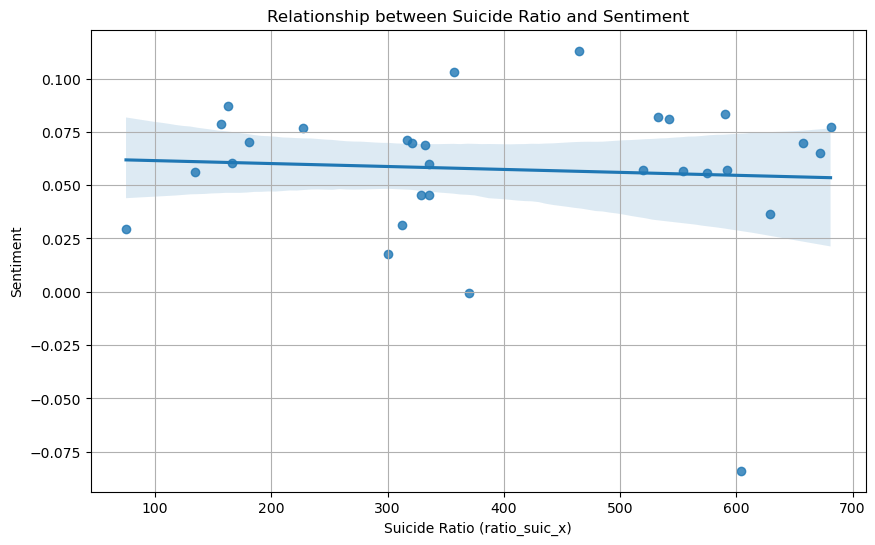

In [ ]:
import matplotlib.pyplot as plt
data = premature_gdf[['ratio_suic_x', 'sentiment']]

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(x='ratio_suic_x', y='sentiment', data=data)
plt.title('Relationship between Suicide Ratio and Sentiment')
plt.xlabel('Suicide Ratio (ratio_suic_x)')
plt.ylabel('Sentiment')
plt.grid(True)
plt.show()

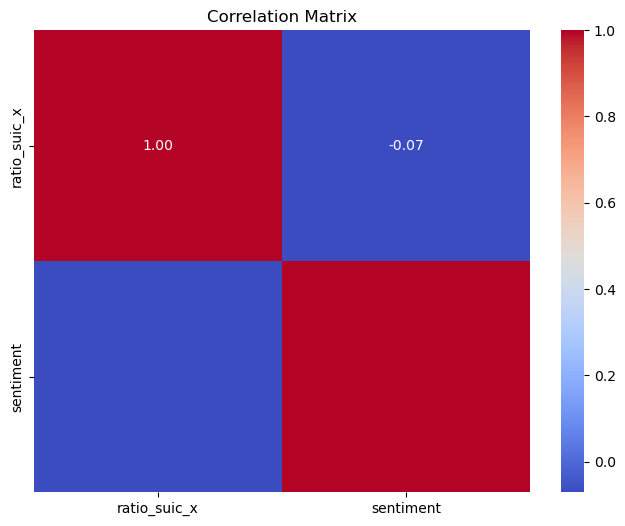

In [ ]:
import seaborn as sns
correlation = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(data[['ratio_suic_x']])
y_scaled = scaler.fit_transform(data[['sentiment']])

In [ ]:
from scipy.stats import pearsonr
# Calculate Pearson correlation coefficient
pearson_corr, pearson_p_value = pearsonr(data['ratio_suic_x'], data['sentiment'])
print(f"Pearson correlation: {pearson_corr}, p-value: {pearson_p_value}")

Pearson correlation: -0.07056191525647182, p-value: 0.7109923658019901
